# Case Study: Traffic Signs Classificaton

<img src="https://raw.githubusercontent.com/josefftan/josefftan.github.io/master/assets/img/portfolio/traffic.png" alt="Girl in a jacket" width="500" height="250" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Traffic-Signs-Classificaton" data-toc-modified-id="Case-Study:-Traffic-Signs-Classificaton-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: Traffic Signs Classificaton</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-and-Dataset-Importation" data-toc-modified-id="Libraries-and-Dataset-Importation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Libraries and Dataset Importation</a></span></li><li><span><a href="#Dataset-Exploration" data-toc-modified-id="Dataset-Exploration-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset Exploration</a></span></li><li><span><a href="#Dataset-Preparation" data-toc-modified-id="Dataset-Preparation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dataset Preparation</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

This case study is particularly important in self-driving car applications similar to human drivers. Self-driving cars need to make decisions based on what they see using camera data. Self-driving cars need to detect objects and classify traffic signs so it can know when it stops yield and how fast it will drive 30 kilometers an hour or 50 kilometers an hour.

**Problem:**
- In this case study, there are images of traffic signs and the goal is to train a Deep Network to classify them


**Datasets**
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

**Sources:**
- J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.

- @inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

# Libraries and Dataset Importation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
# import dataset
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
# Data splitting
X_train, y_train = train['features'], train['labels']
X_validate, y_validate = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Dataset Exploration

In [4]:
# Check train dataset dimension
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [5]:
# Check validation dataset dimension
X_validate.shape, y_validate.shape

((4410, 32, 32, 3), (4410,))

In [6]:
# Check test dataset dimension
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

1

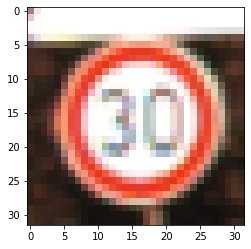

In [7]:
# Check train image
i = 3000
plt.imshow(X_train[i])
y_train[i]

17

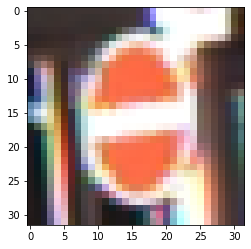

In [8]:
# Check validation image
i = 4000
plt.imshow(X_validate[i])
y_validate[i]

26

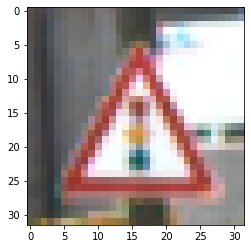

In [9]:
# Check validation image
i = 5000
plt.imshow(X_test[i])
y_test[i]

# Dataset Preparation

In [10]:
#Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
# Make the image greyscale by taking it average
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validate_gray = np.sum(X_validate/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [12]:
# Check the train dimension
X_train_gray.shape, X_validate_gray.shape, X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [13]:
# Normalize dataset
X_train_gray_norm = (X_train_gray - 128)/128 
X_validate_gray_norm = (X_validate_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [14]:
# Check dataset dimension
X_train_gray.shape, X_validate_gray.shape, X_test_gray.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

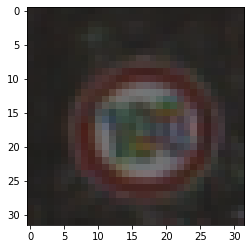

<Figure size 432x288 with 0 Axes>

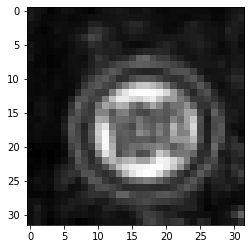

<Figure size 432x288 with 0 Axes>

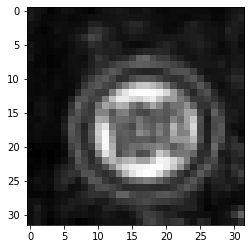

<Figure size 432x288 with 0 Axes>

In [15]:
# Visualize the training dataset
i = 6000

# Original image
plt.imshow(X_train[i])
plt.figure()
plt.show()

# Greyscaled image
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

# Normalized image
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

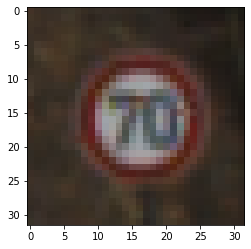

<Figure size 432x288 with 0 Axes>

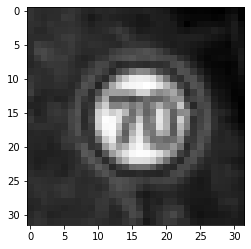

<Figure size 432x288 with 0 Axes>

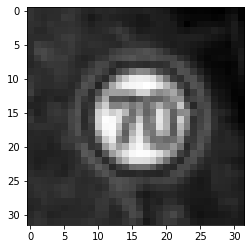

<Figure size 432x288 with 0 Axes>

In [16]:
# Visualize the validation dataset
i = 1000

# Original image
plt.imshow(X_validate[i])
plt.figure()
plt.show()

# Greyscaled image
plt.imshow(X_validate_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

# Normalized image
plt.imshow(X_validate_gray_norm[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

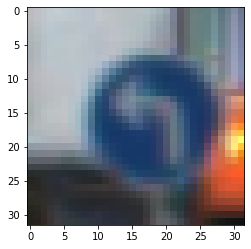

<Figure size 432x288 with 0 Axes>

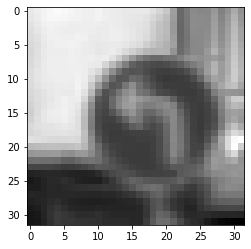

<Figure size 432x288 with 0 Axes>

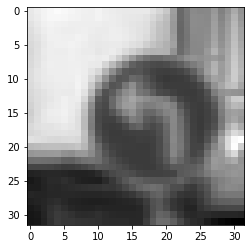

<Figure size 432x288 with 0 Axes>

In [17]:
# Visualize the validation dataset
i = 2000

# Original image
plt.imshow(X_test[i])
plt.figure()
plt.show()

# Greyscaled image
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

# Normalized image
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')
plt.figure()
plt.show()

# Model Training

**The model consists of the following layers:**

**STEP 1: THE FIRST CONVOLUTIONAL LAYER #1**
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


**Stride** is the amount by which the kernel is shifted when the kernel is passed over the image.

**STEP 2: THE SECOND CONVOLUTIONAL LAYER #2**
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

**STEP 3: FLATTENING THE NETWORK**
    - Flatten the network with Input = 5x5x16 and Output = 400

**STEP 4: FULLY CONNECTED LAYER**
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

**STEP 5: ANOTHER FULLY CONNECTED LAYER**
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

**STEP 6: FULLY CONNECTED LAYER**
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [18]:
# Import Libraries
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [19]:
# Build model
cnn_model = Sequential()

# First Layer
cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

# Second layer
cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

# Flattening
cnn_model.add(Flatten())

# Connecting layer
cnn_model.add(Dense(units = 120, activation = 'relu'))

# Connecting layer
cnn_model.add(Dense(units = 84, activation = 'relu'))

# Connecting layer to output
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [20]:
# Compile the model
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [21]:
# Train the model
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size = 500, epochs = 50, verbose = 1, validation_data = (X_validate_gray_norm, y_validate))

Epoch 1/50
70/70 [==============================] - 25s 352ms/step - loss: 3.1278 - accuracy: 0.1861 - val_loss: 2.7057 - val_accuracy: 0.3170
Epoch 2/50
70/70 [==============================] - 27s 385ms/step - loss: 1.6815 - accuracy: 0.5301 - val_loss: 1.5810 - val_accuracy: 0.5315
Epoch 3/50
70/70 [==============================] - 27s 390ms/step - loss: 0.9810 - accuracy: 0.7160 - val_loss: 1.1104 - val_accuracy: 0.6723
Epoch 4/50
70/70 [==============================] - 25s 351ms/step - loss: 0.6682 - accuracy: 0.8109 - val_loss: 0.8697 - val_accuracy: 0.7456
Epoch 5/50
70/70 [==============================] - 26s 371ms/step - loss: 0.5099 - accuracy: 0.8604 - val_loss: 0.8117 - val_accuracy: 0.7626
Epoch 6/50
70/70 [==============================] - 24s 348ms/step - loss: 0.4154 - accuracy: 0.8875 - val_loss: 0.7400 - val_accuracy: 0.7853
Epoch 7/50
70/70 [==============================] - 30s 432ms/step - loss: 0.3576 - accuracy: 0.9013 - val_loss: 0.7340 - val_accuracy: 0.8016

# Model Evaluation

In [23]:
# Check model accuracy
score = cnn_model.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 7s 17ms/step - loss: 1.3257 - accuracy: 0.8592
Test Accuracy: 0.8592240810394287


In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

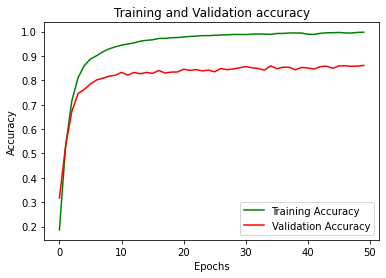

In [36]:
# Label the metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['val_loss']
val_loss = history.history['loss']

# Number of epochs
epochs = range(len(accuracy))

# Plot the evaluation metrics
plt.plot(epochs, accuracy, label='Training Accuracy', c = 'green')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', c = 'red')
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

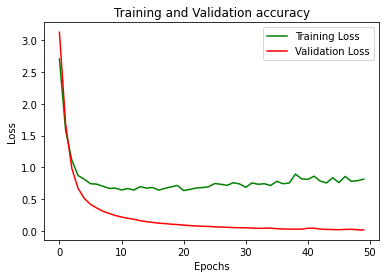

In [37]:
# Plot the evaluation metrics
plt.plot(epochs, loss, label='Training Loss', c = 'green')
plt.plot(epochs, val_loss, label='Validation Loss', c = 'red')
plt.title('Training and Validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [40]:
# Get the predictions for the test data
predicted_classses = np.argmax(cnn_model.predict(X_test_gray_norm), axis=-1)

#get the indices to be plotted
y_true = y_test

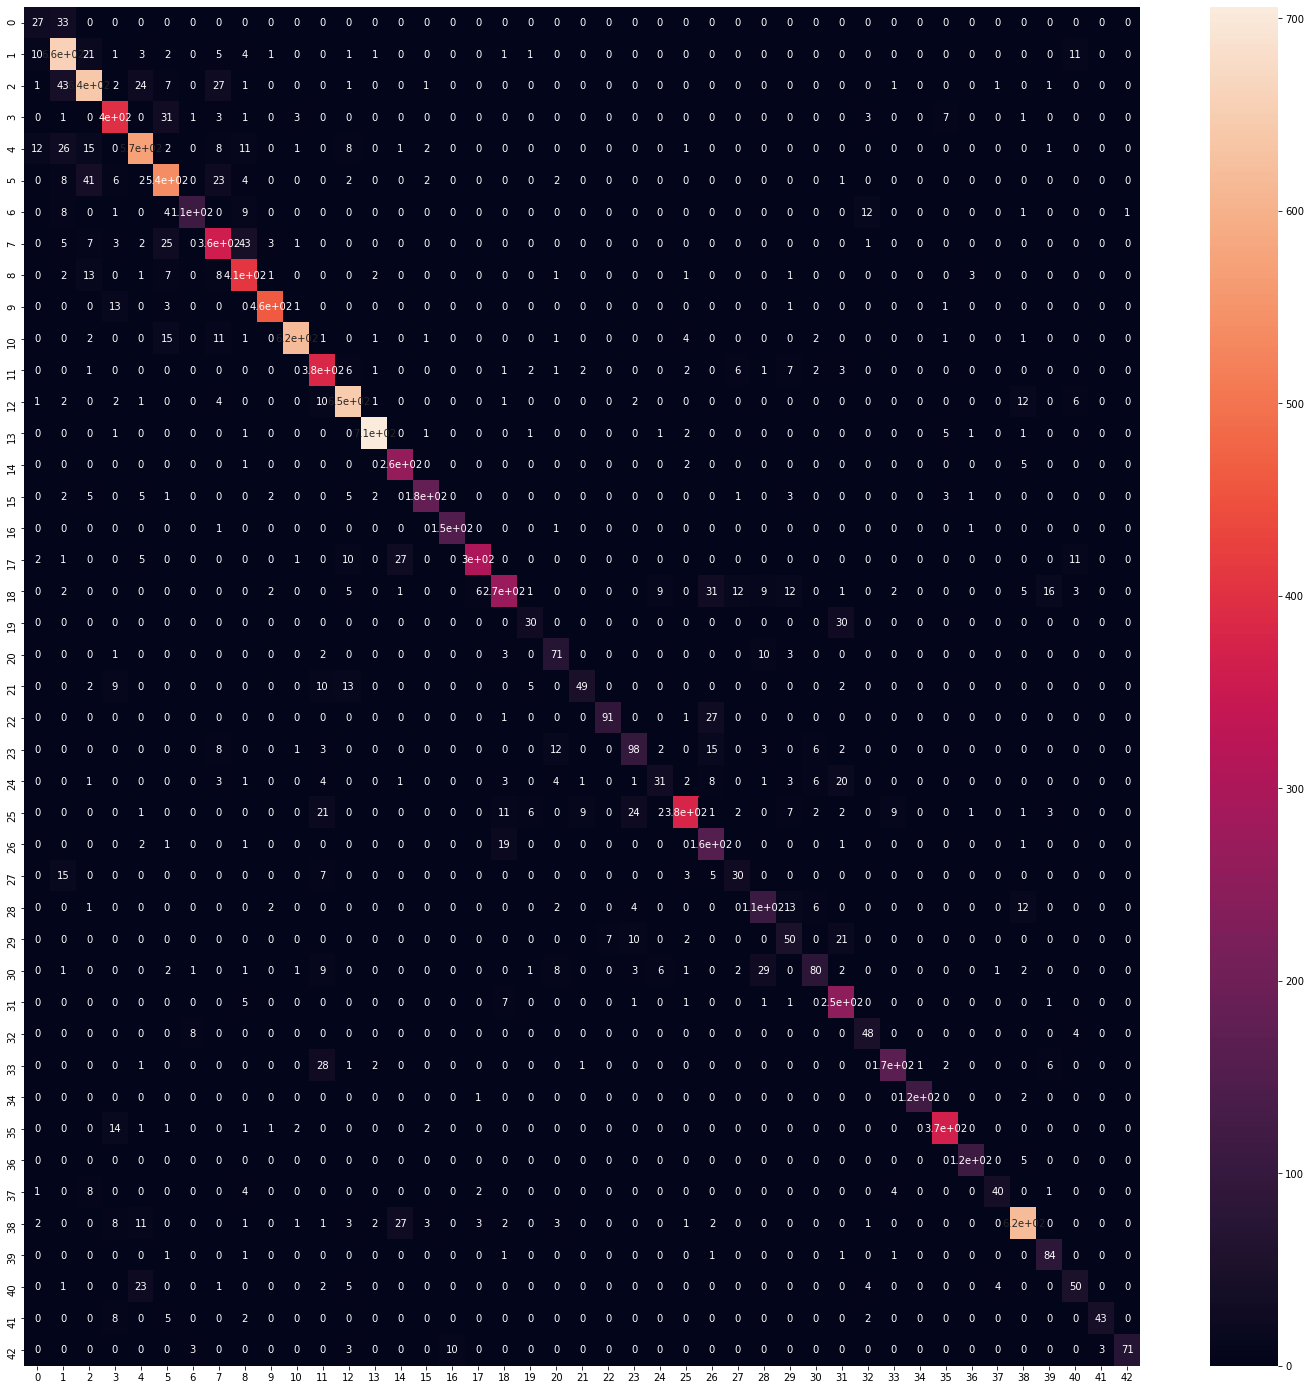

In [42]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)
plt.show()

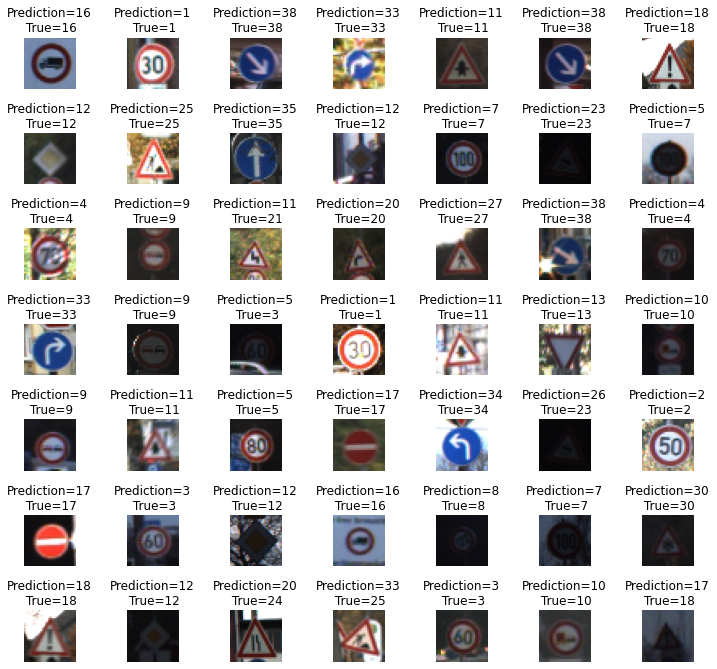

In [43]:
# Create image subplots for image predictions
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# Conclusion

In this case study, LeNet5 Convolutional Neural Network was implemented to classify traffic sign images and was able to achieved 86% accuracy. There are some images that are really hard to recognize even in human naked eye that possibly gave the machine difficulty in identifying the correct traffic signs. This could be further improve in many ways such as removing the unrecognizable traffic signs, adding more sample signs and tuning the parameters.